In [106]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
from scipy.stats import linregress

# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [107]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [108]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1




Beginning Data Retrieval     
-----------------------------


In [109]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each of the latitude and longitude combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

606

In [110]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=12541dcd367261fc7c2e2e12a500423a


In [111]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather["sys"]["country"]
        # Conver the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information itno city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp, 
                         "Humidity": city_humidity, 
                         "Cloudiness": city_clouds, 
                         "Wind Speed": city_wind, 
                         "Country": city_country, 
                         "Date": city_date})

# If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass
    
# Indidcate that Data Loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Processing Record 1 of Set 1 | marawi
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | wanning
Processing Record 7 of Set 1 | atherton
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | sampit
Processing Record 12 of Set 1 | yumen
Processing Record 13 of Set 1 | hualmay
Processing Record 14 of Set 1 | adiake
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | zhigansk
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | baker city
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Set 1 | upernavik
Processing Record 24 of Set 1 | mataura
Processing Recor

Processing Record 38 of Set 4 | karangasem
Processing Record 39 of Set 4 | somotillo
Processing Record 40 of Set 4 | bethel
Processing Record 41 of Set 4 | praya
Processing Record 42 of Set 4 | high rock
Processing Record 43 of Set 4 | chapada dos guimaraes
Processing Record 44 of Set 4 | provideniya
Processing Record 45 of Set 4 | portland
Processing Record 46 of Set 4 | lata
Processing Record 47 of Set 4 | luderitz
Processing Record 48 of Set 4 | narrabri
Processing Record 49 of Set 4 | biloela
Processing Record 50 of Set 4 | urubicha
Processing Record 1 of Set 5 | deer lake
Processing Record 2 of Set 5 | kemijarvi
City not found. Skipping...
Processing Record 3 of Set 5 | yagodnoye
Processing Record 4 of Set 5 | do gonbadan
Processing Record 5 of Set 5 | saint-pierre
Processing Record 6 of Set 5 | lisakovsk
Processing Record 7 of Set 5 | dingle
Processing Record 8 of Set 5 | vila velha
Processing Record 9 of Set 5 | vila
Processing Record 10 of Set 5 | saleaula
City not found. Skipp

Processing Record 22 of Set 8 | tura
Processing Record 23 of Set 8 | miri
Processing Record 24 of Set 8 | chuy
Processing Record 25 of Set 8 | spornoye
Processing Record 26 of Set 8 | russell
Processing Record 27 of Set 8 | general roca
Processing Record 28 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 29 of Set 8 | port hedland
Processing Record 30 of Set 8 | shimoda
Processing Record 31 of Set 8 | bend
Processing Record 32 of Set 8 | foumban
Processing Record 33 of Set 8 | bani
Processing Record 34 of Set 8 | salalah
Processing Record 35 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 36 of Set 8 | college
Processing Record 37 of Set 8 | sur
Processing Record 38 of Set 8 | lithakia
Processing Record 39 of Set 8 | bangassou
Processing Record 40 of Set 8 | itarema
Processing Record 41 of Set 8 | mareeba
Processing Record 42 of Set 8 | barcelona
Processing Record 43 of Set 8 | tougue
Processing Record 44 of Set 8 | wajima
Processing Record 45 of S

Processing Record 10 of Set 12 | dryden
Processing Record 11 of Set 12 | nizwa
Processing Record 12 of Set 12 | kysyl-syr
Processing Record 13 of Set 12 | songea
Processing Record 14 of Set 12 | wasilla
Processing Record 15 of Set 12 | clovis
Processing Record 16 of Set 12 | peniche
Processing Record 17 of Set 12 | qaqortoq
Processing Record 18 of Set 12 | port macquarie
Processing Record 19 of Set 12 | coulihaut
City not found. Skipping...
Processing Record 20 of Set 12 | la romana
Processing Record 21 of Set 12 | berdigestyakh
Processing Record 22 of Set 12 | nemuro
Processing Record 23 of Set 12 | meyungs
City not found. Skipping...
Processing Record 24 of Set 12 | ramon
Processing Record 25 of Set 12 | morki
Processing Record 26 of Set 12 | eureka
Processing Record 27 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 28 of Set 12 | arzgir
Processing Record 29 of Set 12 | weligama
Processing Record 30 of Set 12 | turbat
Processing Record 31 of Set 12 | cockburn town

In [86]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tasiilaq,100,GL,2019-11-06 04:14:27,50,65.61,-37.64,33.80,31.09
1,Saint-Philippe,90,CA,2019-11-06 04:13:51,70,45.36,-73.48,43.00,14.99
2,Manali,0,IN,2019-11-06 04:17:36,36,32.25,77.19,49.64,0.96
3,Jamestown,0,AU,2019-11-06 04:13:56,27,-33.21,138.60,75.06,24.05
4,Sangmelima,0,CM,2019-11-06 04:17:36,98,2.93,11.98,65.32,1.88
5,Herbeumont,43,BE,2019-11-06 04:17:37,100,49.78,5.24,46.00,5.82
6,Punta Arenas,75,CL,2019-11-06 04:13:32,86,-53.16,-70.91,37.40,19.46
7,Port Lincoln,0,AU,2019-11-06 04:15:03,48,-34.72,135.86,65.35,21.12
8,Carhuaz,100,PE,2019-11-06 04:17:37,89,-9.28,-77.65,43.21,4.83
9,Greymouth,100,NZ,2019-11-06 04:17:38,96,-42.45,171.21,56.48,18.32


In [87]:
# reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [88]:
# Reordered DataFrame
city_data_df = city_data_df[new_column_order]

In [89]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2019-11-06 04:14:27,65.61,-37.64,33.80,50,100,31.09
1,Saint-Philippe,CA,2019-11-06 04:13:51,45.36,-73.48,43.00,70,90,14.99
2,Manali,IN,2019-11-06 04:17:36,32.25,77.19,49.64,36,0,0.96
3,Jamestown,AU,2019-11-06 04:13:56,-33.21,138.60,75.06,27,0,24.05
4,Sangmelima,CM,2019-11-06 04:17:36,2.93,11.98,65.32,98,0,1.88
5,Herbeumont,BE,2019-11-06 04:17:37,49.78,5.24,46.00,100,43,5.82
6,Punta Arenas,CL,2019-11-06 04:13:32,-53.16,-70.91,37.40,86,75,19.46
7,Port Lincoln,AU,2019-11-06 04:15:03,-34.72,135.86,65.35,48,0,21.12
8,Carhuaz,PE,2019-11-06 04:17:37,-9.28,-77.65,43.21,89,100,4.83
9,Greymouth,NZ,2019-11-06 04:17:38,-42.45,171.21,56.48,96,100,18.32


In [90]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [91]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [92]:
# Import the time module - PENDING
import time
# Get today's date in seconds
today = time.time()
today

1573014132.3313951

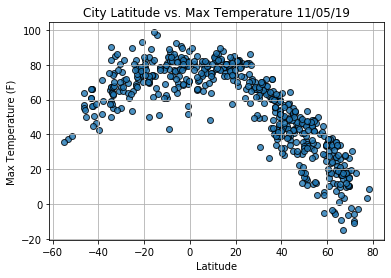

In [93]:
# Build the scatter plot for latitude vs. max temp
plt.scatter(lats, 
           max_temps,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

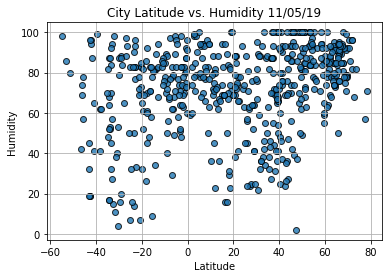

In [94]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, 
           humidity,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

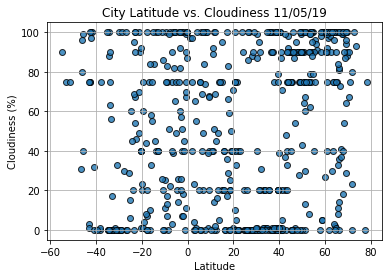

In [95]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, 
           cloudiness,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

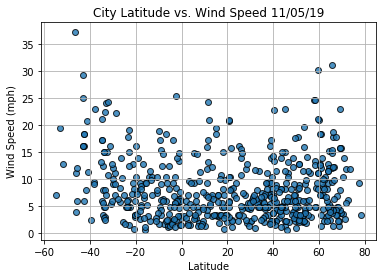

In [96]:
# Build the scatter plot for latitude vs. Wind speed
plt.scatter(lats, 
           wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

# Fix the plt.title string to make it Y vs. X, find a way to move r value to the plot

In [158]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope +  intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plt and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(r_value, text_coordinates, fontsize=15, color="blue")
    plt.title("Fix this")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [159]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2019-11-06 04:12:35
Lat                         42.65
Lng                        -73.75
Max Temp                       45
Humidity                       69
Cloudiness                     20
Wind Speed                    4.7
Name: 13, dtype: object

In [160]:
# Northern Hemisphere cities
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
5       True
6      False
7      False
8      False
9      False
10      True
11     False
12     False
13      True
14      True
15      True
16     False
17      True
18     False
19     False
20     False
21     False
22     False
23      True
24     False
25      True
26      True
27      True
28      True
29     False
       ...  
536     True
537    False
538     True
539    False
540     True
541     True
542     True
543     True
544     True
545     True
546     True
547     True
548     True
549     True
550     True
551     True
552     True
553    False
554     True
555     True
556     True
557     True
558    False
559     True
560    False
561     True
562     True
563     True
564    False
565     True
Name: Lat, Length: 566, dtype: bool

In [161]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

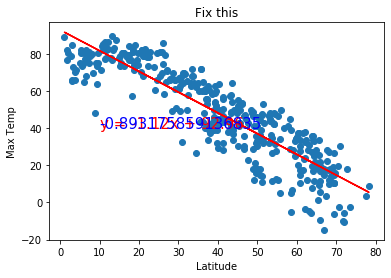

In [162]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))

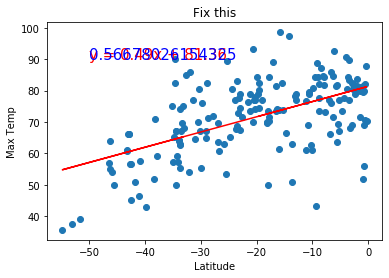

In [163]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50,90))

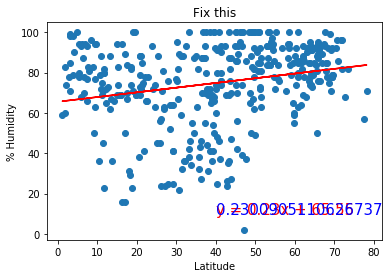

In [164]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (40,10))


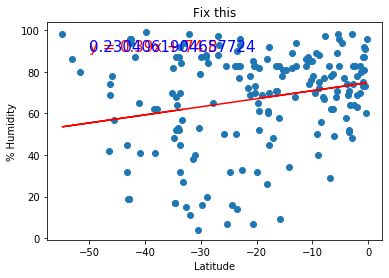

In [165]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-50,90))


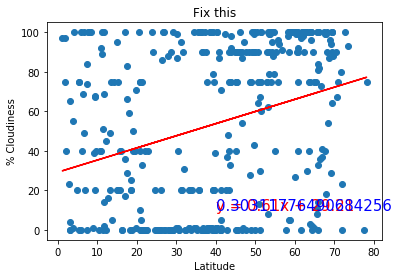

In [166]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (40,10))


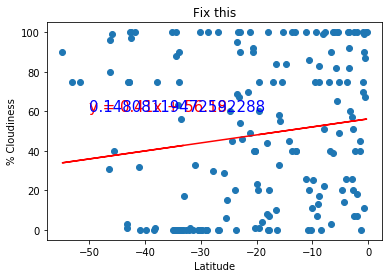

In [168]:
# Linear regression on the Southern Hemisphere on Cloudiness

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-50,60))


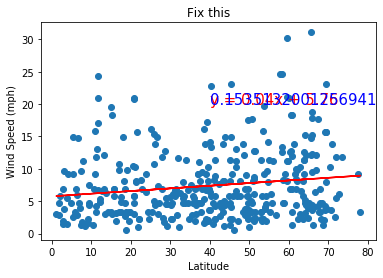

In [175]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)', (40,20))

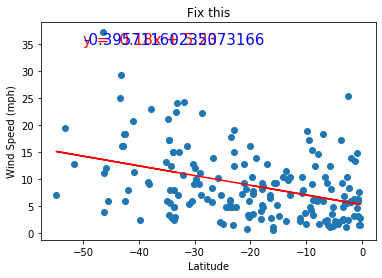

In [176]:
# Linear regression on the Southern Hemisphere on Wind Speed

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)', (-50,35))
